In [1]:
from astropy.io import fits
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hdul = fits.open('hlsp_cdips_tess_ffi_gaiatwo0006718138538180152704-0013-cam1-ccd3_tess_v01_llc.fits')

In [3]:
d = hdul[1].data

In [1]:
time, mag = d['TMID_BJD'], d['PCA1']
from cdips.plotting.vetting_pdf import _given_mag_get_flux
flux = _given_mag_get_flux(mag)

NameError: name 'd' is not defined

In [5]:
from cdips.lcproc.detrend import detrend_flux
from copy import deepcopy
flat_flux, trend_flux = detrend_flux(time, flux)

plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(time, flux, c='k', s=2, zorder=2)
ax.scatter(time, trend_flux, c='r', s=1, zorder=1)
plt.savefig('PCA1_vs_flux.png', dpi=300)

Segment 1 of 2
Iteration: 1 Rejected outliers: 8
Iteration: 2 Rejected outliers: 6
Iteration: 3 Rejected outliers: 0
Converged.
Segment 2 of 2
Iteration: 1 Rejected outliers: 17
Iteration: 2 Rejected outliers: 8
Iteration: 3 Rejected outliers: 8
Iteration: 4 Rejected outliers: 6
Iteration: 5 Rejected outliers: 2
Iteration: 6 Rejected outliers: 2
Iteration: 7 Rejected outliers: 2
Iteration: 8 Rejected outliers: 2
Iteration: 9 Rejected outliers: 0
Converged.


In [6]:
flux = deepcopy(flat_flux)

In [7]:
from transitleastsquares import transitleastsquares

model = transitleastsquares(time, flux)
results = model.power()
plt.figure()
plt.plot(
    results.model_folded_phase,
    results.model_folded_model,
    color='red')
plt.scatter(
    results.folded_phase,
    results.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.45, 0.55)
plt.xlabel('Phase')
plt.ylabel('Relative flux')
plt.savefig('PCA1_vs_phase_main_transit.png', dpi=300);


  0%|          | 0/2204 periods | 00:00<?

Transit Least Squares TLS 1.0.24 (21 November 2019)
Creating model cache for 27 durations
Searching 1129 data points, 2204 periods from 0.601 to 12.313 days
Using all 16 CPU threads


100%|██████████| 2204/2204 periods | 00:03<00:00 


In [8]:
# mask and continue

from transitleastsquares import transit_mask, cleaned_array
intransit = transit_mask(time, results.period, 2*results.duration, results.T0)
y_second_run = flux[~intransit]
t_second_run = time[~intransit]
t_second_run, y_second_run = cleaned_array(t_second_run, y_second_run)

plt.close()

plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(t_second_run, y_second_run, c='k', s=2, zorder=2)
plt.savefig('PCA1_vs_flux_after_masking.png', dpi=300);

In [9]:
model_second_run = transitleastsquares(t_second_run, y_second_run)
results_second_run = model_second_run.power()
plt.figure()
ax = plt.gca()
ax.axvline(results_second_run.period, alpha=0.4, lw=3)
plt.xlim(np.min(results_second_run.periods), np.max(results_second_run.periods))
for n in range(2, 10):
    ax.axvline(n*results_second_run.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_second_run.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_second_run.periods, results_second_run.power, color='black', lw=0.5)
plt.xlim(0, max(results_second_run.periods))
plt.savefig('tls_spectrum_after_masking.png', dpi=300);

  0%|          | 0/2204 periods | 00:00<?

Transit Least Squares TLS 1.0.24 (21 November 2019)
Creating model cache for 27 durations
Searching 1089 data points, 2204 periods from 0.601 to 12.313 days
Using all 16 CPU threads


100%|██████████| 2204/2204 periods | 00:03<00:00 


In [10]:
plt.figure()
plt.plot(
    results_second_run.model_folded_phase,
    results_second_run.model_folded_model,
    color='red')
plt.scatter(
    results_second_run.folded_phase,
    results_second_run.folded_y,
    color='k',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.45, 0.55)
plt.xlabel('Phase')
plt.ylabel('Relative flux')
plt.savefig('flux_vs_phase_after_masking.png', dpi=300);

In [11]:
plt.figure(figsize=(10,3))
in_transit = transit_mask(
    t_second_run,
    results_second_run.period,
    results_second_run.duration,
    results_second_run.T0)
plt.scatter(
    t_second_run[in_transit],
    y_second_run[in_transit],
    color='red',
    s=2,
    zorder=0)
plt.scatter(
    t_second_run[~in_transit],
    y_second_run[~in_transit],
    color='k',
    alpha=1,
    s=2,
    zorder=2)
plt.plot(
    results_second_run.model_lightcurve_time,
    results_second_run.model_lightcurve_model, alpha=0.5, color='red', zorder=-1, lw=0.5)
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
plt.savefig('flux_vs_time_after_masking.png', dpi=300);

In [12]:
results_second_run.period

5.985281174006705

In [13]:
results.period

5.985281174006705

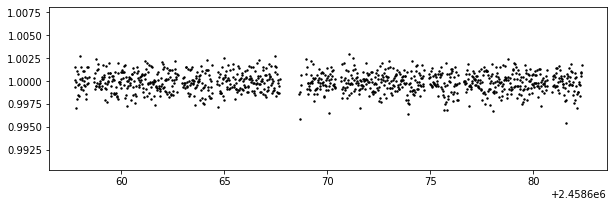

In [14]:
intransit = transit_mask(t_second_run, results_second_run.period, 2*results_second_run.duration, results_second_run.T0)

y_third_run = y_second_run[~intransit]
t_third_run = t_second_run[~intransit]
t_third_run, y_third_run = cleaned_array(t_third_run, y_third_run)

%matplotlib inline
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(t_third_run, y_third_run, c="k", s=2, zorder=2)
plt.savefig('flux_vs_time_after_masking2.png', dpi=300);

  0%|          | 0/2204 periods | 00:00<?

Transit Least Squares TLS 1.0.24 (21 November 2019)
Creating model cache for 27 durations
Searching 1046 data points, 2204 periods from 0.601 to 12.313 days
Using all 16 CPU threads


100%|██████████| 2204/2204 periods | 00:03<00:00 
/Users/luke/local/miniconda3/envs/py37/lib/python3.7/site-packages/transitleastsquares/stats.py:456: RuntimeWarning: divide by zero encountered in double_scalars
  snr_pink_per_transit[i] = (1 - mean_flux) / pinknoise


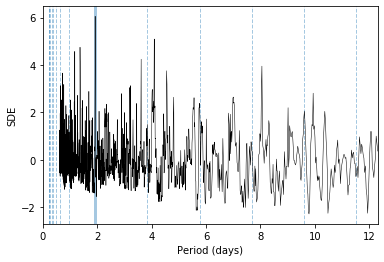

In [15]:
model_third_run = transitleastsquares(t_third_run, y_third_run)
results_third_run = model_third_run.power()
plt.figure()
ax = plt.gca()
ax.axvline(results_third_run.period, alpha=0.4, lw=3)
plt.xlim(np.min(results_third_run.periods), np.max(results_third_run.periods))
for n in range(2, 10):
    ax.axvline(n*results_third_run.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_third_run.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_third_run.periods, results_third_run.power, color='black', lw=0.5)
plt.xlim(0, max(results_third_run.periods))
plt.savefig('periodogram_after_masking2.png', dpi=300);

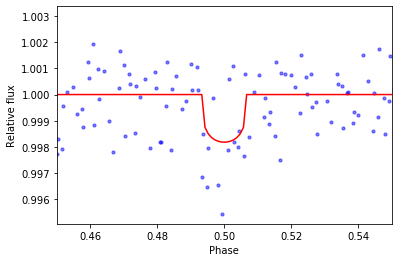

In [16]:
plt.figure()
plt.plot(
    results_third_run.model_folded_phase,
    results_third_run.model_folded_model,
    color='red')
plt.scatter(
    results_third_run.folded_phase,
    results_third_run.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.45, 0.55)
plt.xlabel('Phase')
plt.ylabel('Relative flux')
plt.savefig('phasefold_after_masking2.png', dpi=300);

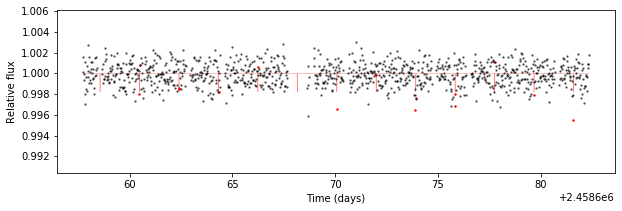

In [17]:
plt.close('all')
plt.figure(figsize=(10,3))
in_transit = transit_mask(
    t_third_run,
    results_third_run.period,
    results_third_run.duration,
    results_third_run.T0)
plt.scatter(
    t_third_run[in_transit],
    y_third_run[in_transit],
    color='red',
    s=2,
    zorder=0)
plt.scatter(
    t_third_run[~in_transit],
    y_third_run[~in_transit],
    color='k',
    alpha=0.5,
    s=2,
    zorder=0)
plt.plot(
    results_third_run.model_lightcurve_time,
    results_third_run.model_lightcurve_model, alpha=0.5, color='red', zorder=-1, lw=0.5)
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
plt.savefig('fluxvstime_model_after_masking2.png', dpi=300);